In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
SVM REGRESSOR :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html<br>
SVM CLASSIFIER :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
DECISION TREE CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
DECISION TREE Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

METRICS:
R2_SCORE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
MSE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
MAE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>

WRITE THE CODE FOR IMPORTING THE DATA

In [2]:
data = pd.read_csv('WEEK4.csv')

In [3]:
data.head()

,price,year,mileage,color,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,...,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP
0,2899,2011,190552.0,silver,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,5350,2018,39590.0,silver,2,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,25000,2014,64146.0,blue,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,27700,2018,6654.0,red,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5700,2018,45561.0,white,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


ONE HOT ENCODING THE COLOR COLUMN AND THEN DROPPING THE COLOR COLUMN

In [4]:
#ONE HOT ENCODING THE COLOR COLUMN
data = pd.concat([data,pd.get_dummies(data['color']).drop('white',axis=1)],axis = 1)
data = data.drop('color',axis = 1)

In [5]:
# VIEWING THE DATA ONCE
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,2899,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5350,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,25000,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,27700,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5700,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


WE USE THE train_test_split_function TO SPLIT THE DATA INTO TRAIN AND TEST <br>
HERE WE IMPORT IT FROM SKLEARN

In [6]:
from sklearn.model_selection import train_test_split as tts

LET US LOOK AT THE PRICES DISTRIBUTION

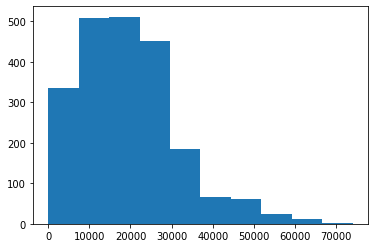

In [7]:
plt.hist(data['price']);

IT IS LEFT-SKEWED, WE HAVE LEARNT HOW TO HANDLE SKEWED DATA<br>
We will either use log transform or sqrt transform

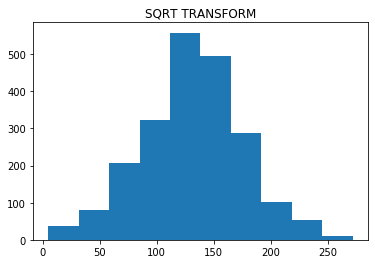

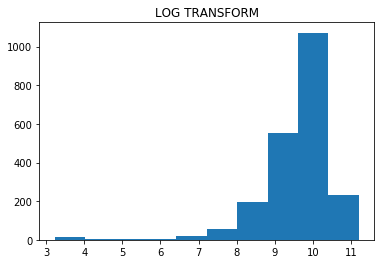

In [8]:
#WE HAVE WRITTEN THE CODE FOR PLOTTING THE HISTOGRAM FOR THE LOG-TRANSFORMED PRICE COLUMN AND SQRT TRANSFORMED SQRT COLUMN.
plt.hist(np.sqrt(data['price']));
plt.title('SQRT TRANSFORM');
plt.show()
plt.hist(np.log(data['price']));
plt.title('LOG TRANSFORM');
plt.show()

CLEARLY SQRT TRANSFORM IS BETTER

In [9]:
#WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']),2)
data['price']

0        53.84
1        73.14
2       158.11
3       166.43
4        75.50
         ...  
2148     88.32
2149     95.92
2150     95.92
2151     95.92
2152     95.92
Name: price, Length: 2153, dtype: float64

In [10]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [11]:
#LET US PRINT THE SHAPES
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('\nExpected shapes')
print((1722, 25))
print((431, 25))
print((1722,))
print((431,))
print('\nVerify if they are matching')

(1722, 25)
(431, 25)
(1722,)
(431,)

Expected shapes
(1722, 25)
(431, 25)
(1722,)
(431,)

Verify if they are matching


NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br>


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Linear Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(Linreg.predict(X_test)))))
9
# WRITE CODE FOR MEAN SQUARE ERROR AND ME
# Start code
print(mean_squared_error(np.square(y_test),np.square(Linreg.predict(X_test))))
print(mean_squared_error(np.square(y_train),np.square(Linreg.predict(X_train))))
print(mean_absolute_error(np.square(y_test),np.square(Linreg.predict(X_test))))
print(mean_absolute_error(np.square(y_train),np.square(Linreg.predict(X_train))))
# End code

print("\n")
print("The correct values are :")


print('Linear Regression Training R2 score is 0.3577935806672855')
print('Linear Regression Testing R2 score is 0.33405970134102436')
print('Linear Regression Training mean_square_error is 90997459.24038002')
print('Linear Regression Testing mean_square_error is 93998879.06677869')
print('Linear Regression Training mean_absolute_error is 6864.980505017769')
print('Linear Regression Testing mean_absolute_error is 6926.987292556893')

print("\nPlease verify if you have got the same values")

Linear Regression Training R2 score is 0.3577935806672953
Linear Regression Testing R2 score is 0.3340597013410359
93998879.06677707
90997459.24037863
6926.987292556906
6864.980505017781


The correct values are :
Linear Regression Training R2 score is 0.3577935806672855
Linear Regression Testing R2 score is 0.33405970134102436
Linear Regression Training mean_square_error is 90997459.24038002
Linear Regression Testing mean_square_error is 93998879.06677869
Linear Regression Training mean_absolute_error is 6864.980505017769
Linear Regression Testing mean_absolute_error is 6926.987292556893

Please verify if you have got the same values


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF DECISION TREE IN REGRESSION <br>

In [13]:
from sklearn.tree import DecisionTreeRegressor

# INITIALIZE THE DECISION TREE WITH criterion as mse, max depth as 7 and Random State as 1
# USE THE FIT METHOD TO FIND THE R2_SCORE, MSE, MAE For training as well as testing data


# START CODE
dtr = DecisionTreeRegressor(criterion = 'mse',max_depth = 7,random_state=1)
dtr.fit(X_train,y_train)
r2train = r2_score(np.square(y_train),np.square(dtr.predict(X_train)))
r2test = r2_score(np.square(y_test),np.square(dtr.predict(X_test)))
meansquaretraindtr= mean_squared_error(np.square(y_train),np.square(dtr.predict(X_train)))
meansquaretestdtr= mean_squared_error(np.square(y_test),np.square(dtr.predict(X_test)))
meanabsolutetraindtr= mean_absolute_error(np.square(y_train),np.square(dtr.predict(X_train)))
meanabsolutetestdtr= mean_absolute_error(np.square(y_test),np.square(dtr.predict(X_test)))
print("r2train: " ,r2train)
print("r2test: " ,r2test)
print("mean_square_error_train: " ,meansquaretraindtr)
print("mean_square_error_test: " ,meansquaretestdtr)
print("mean_absolute_error_train: " ,meanabsolutetraindtr)
print("mean_absolute_error_test: " ,meanabsolutetestdtr)

                           
# END CODE

r2train:  0.422869230755335
r2test:  0.36145560633416207
mean_square_error_train:  81776562.90835412
mean_square_error_test:  90131889.2396716
mean_absolute_error_train:  6266.244817595775
mean_absolute_error_test:  6846.025816839579


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF SVM IN REGRESSION <br>

In [14]:
from sklearn.svm import SVR
# INITIALIZE THE SVM WITH kernel as 'poly', maximum number of iterations as 3000, degree as 2, C(regularization parameter) as 0.1 
# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

# START CODE
svmr = SVR(kernel='poly', degree=2,C=0.1, max_iter=3000)
svmr.fit(X_train,y_train)
svmr2train = r2_score(np.square(y_train),np.square(svmr.predict(X_train)))
svmr2test = r2_score(np.square(y_test),np.square(svmr.predict(X_test)))
meansquaretrainsvm= mean_squared_error(np.square(y_train),np.square(svmr.predict(X_train)))
meansquaretestsvm= mean_squared_error(np.square(y_test),np.square(svmr.predict(X_test)))
meanabsolutetrainsvm= mean_absolute_error(np.square(y_train),np.square(svmr.predict(X_train)))
meanabsolutetestsvm= mean_absolute_error(np.square(y_test),np.square(svmr.predict(X_test)))
print("r2train: " ,svmr2train)
print("r2test: " ,svmr2test)
print("mean_square_error_train: " ,meansquaretrainsvm)
print("mean_square_error_test: " ,meansquaretestsvm)
print("mean_absolute_error_train: " ,meanabsolutetrainsvm)
print("mean_absolute_error_test: " ,meanabsolutetestsvm)

# END CODE

r2train:  -21.378337117720697
r2test:  0.0879391173112708
mean_square_error_train:  3170899197.5713468
mean_square_error_test:  128739319.10418974
mean_absolute_error_train:  9831.444528754593
mean_absolute_error_test:  8348.703212635415


YOU MIGHT SEE WORSE VALUES WHEN COMPARED TO LINEAR REGRESSION OR DECISION TREE AS THE DATA IS UNSCALED AND SVM REQUIRES MUCH MORE PREPROCESSING AND TUNING...BUT WE WON'T DO THAT HERE AS OUR AIM WAS JUST TO IMPLEMENT THE MODELS

<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF Random Forest IN REGRESSION <br>

In [15]:
from sklearn.ensemble import RandomForestRegressor
# INITIALIZE THE Random Forest Regressor WITH no: of trees as 200, max_depth as 9, n_jobs as -1(read documentation for more details) and random state as 1 

# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

# START CODE
rfr = RandomForestRegressor(n_estimators = 200,max_depth = 9,n_jobs = -1,random_state = 1)
rfr.fit(X_train,y_train)
rfrr2train = r2_score(np.square(y_train),np.square(rfr.predict(X_train)))
rfrr2test = r2_score(np.square(y_test),np.square(rfr.predict(X_test)))
meansquaretrainrfr= mean_squared_error(np.square(y_train),np.square(rfr.predict(X_train)))
meansquaretestrfr= mean_squared_error(np.square(y_test),np.square(rfr.predict(X_test)))
meanabsolutetrainrfr= mean_absolute_error(np.square(y_train),np.square(rfr.predict(X_train)))
meanabsolutetestrfr= mean_absolute_error(np.square(y_test),np.square(rfr.predict(X_test)))
print("r2train: " ,rfrr2train)
print("r2test: " ,rfrr2test)
print("mean_square_error_train: " ,meansquaretrainrfr)
print("mean_square_error_test: " ,meansquaretestrfr)
print("mean_absolute_error_train: " ,meanabsolutetrainrfr)
print("mean_absolute_error_test: " ,meanabsolutetestrfr)

# END CODE

r2train:  0.5524364393379151
r2test:  0.3997413290406361
mean_square_error_train:  63417533.12143005
mean_square_error_test:  84727778.65210524
mean_absolute_error_train:  5528.669046457424
mean_absolute_error_test:  6695.668840563838


NOW FOR CLASSIFICATION MODELS WE NEED TO CONVERT THE TARGET VARIABLE INTO DIFFERENT CLASSES

In [16]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000

In [17]:
data.loc[np.square(data['price']) < 20000,'price'] = 0
data.loc[np.square(data['price']) >= 20000,'price'] = 1


In [18]:
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,0.0,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.0,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

In [21]:
# INITIALIZE Logistic Regression BY TAKING solver as 'lbfgs', max_iter as 2000, C as 0.5 and penalty as 'l2' and random_state as 1 
# FIT Logistic Regression ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR LOGISTIC REGRESSION
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
log = LogisticRegression(solver = 'lbfgs',max_iter = 2000, C = 0.5, penalty = 'l2',random_state = 1 )
log.fit(X_train,y_train)
y_prediction = np.square(log.predict(X_test))
confusion = confusion_matrix(y_test,y_prediction)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print("TPR, Senstivity: ",(TP/(TP+FN)))
print("FPR: ",(FP/(TN+FP)))
print("Specivity: ", (TN/(TN+FP)))
print("Accuracy: ",((TP+TN)/(TP+TN+FP+FN)))


# END CODE

TPR, Senstivity:  0.6542553191489362
FPR:  0.22633744855967078
Specivity:  0.7736625514403292
Accuracy:  0.7215777262180975


In [22]:
# Logistic regression for training data

log = LogisticRegression(solver = 'lbfgs',max_iter = 2000, C = 0.5, penalty = 'l2',random_state = 1 )
log.fit(X_train,y_train)
y_prediction = np.square(log.predict(X_train))
confusion = confusion_matrix(y_train,y_prediction)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print("TPR, Senstivity: ",(TP/(TP+FN)))
print("FPR: ",(FP/(TN+FP)))
print("Specivity: ", (TN/(TN+FP)))
print("Accuracy: ",((TP+TN)/(TP+TN+FP+FN)))


TPR, Senstivity:  0.6502115655853314
FPR:  0.228035538005923
Specivity:  0.771964461994077
Accuracy:  0.721835075493612


In [23]:
confusion = confusion_matrix(y_train,y_prediction)
confusion

array([[782, 231],
       [248, 461]], dtype=int64)

Text(69.0, 0.5, 'Truth test')

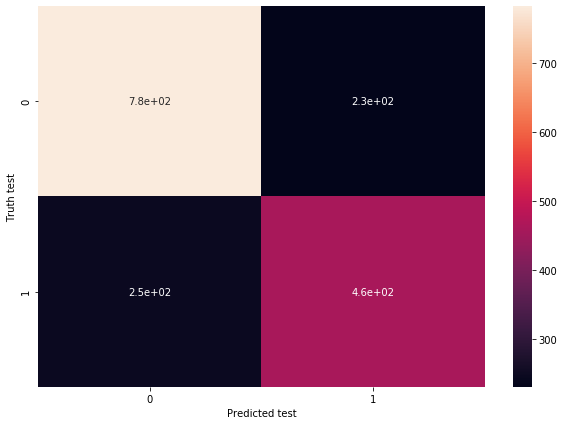

In [24]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion, annot = True)
plt.xlabel('Predicted test')
plt.ylabel('Truth test')

In [25]:
# INITIALIZE SVM BY TAKING kernal as 'rbf', max_iter as 1000 and random_state as 1 and gamma as scale
# FIT SVM ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR SVM
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
svc = SVC(kernel = 'rbf',max_iter = 1000, C = 0.5, gamma = 'scale',random_state = 1 )
svc.fit(X_train,y_train)
y_predict = np.square(svc.predict(X_test))
cn = confusion_matrix(y_test,y_predict)
TP_SVC = cn[1][1]
TN_SVC = cn[0][0]
FP_SVC = cn[0][1]
FN_SVC = cn[1][0]

print("TPR, Senstivity: ",(TP_SVC/(TP_SVC+FN_SVC)))
print("FPR: ",(FP_SVC/(TN_SVC+FP_SVC)))
print("Specivity: ", (TN_SVC/(TN_SVC+FP_SVC)))
print("Accuracy: ",((TP_SVC+TN_SVC)/(TP_SVC+TN_SVC+FP_SVC+FN_SVC)))

# END CODE


TPR, Senstivity:  0.5425531914893617
FPR:  0.1440329218106996
Specivity:  0.8559670781893004
Accuracy:  0.7192575406032483


In [26]:
# For training data SVC

svc = SVC(kernel = 'rbf',max_iter = 1000, C = 0.5, gamma = 'scale',random_state = 1 )
svc.fit(X_train,y_train)
y_predict = np.square(svc.predict(X_train))
cn = confusion_matrix(y_train,y_predict)
TP_SVC = cn[1][1]
TN_SVC = cn[0][0]
FP_SVC = cn[0][1]
FN_SVC = cn[1][0]

print("TPR, Senstivity: ",(TP_SVC/(TP_SVC+FN_SVC)))
print("FPR: ",(FP_SVC/(TN_SVC+FP_SVC)))
print("Specivity: ", (TN_SVC/(TN_SVC+FP_SVC)))
print("Accuracy: ",((TP_SVC+TN_SVC)/(TP_SVC+TN_SVC+FP_SVC+FN_SVC)))


TPR, Senstivity:  0.5119887165021156
FPR:  0.1510365251727542
Specivity:  0.8489634748272458
Accuracy:  0.7102206736353078


In [27]:
cn = confusion_matrix(y_train,y_predict)
cn

array([[860, 153],
       [346, 363]], dtype=int64)

Text(69.0, 0.5, 'Truth test')

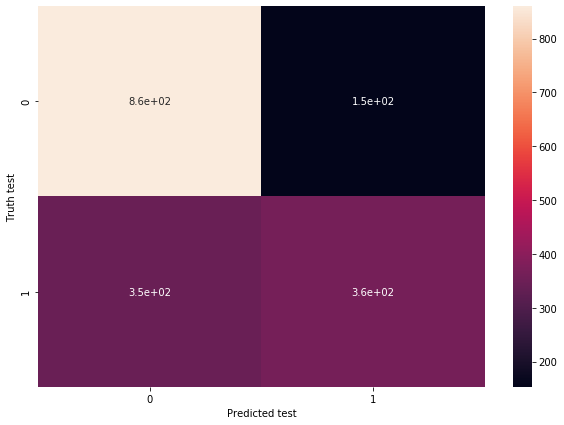

In [28]:
plt.figure(figsize = (10,7))
sn.heatmap(cn, annot = True)
plt.xlabel('Predicted test')
plt.ylabel('Truth test')

In [29]:

# INITIALIZE DECISION TREE CLASSIFIER BY TAKING criterion as 'gini' , max_depth as 3, and random_state as 1
# FIT Decision Tree ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Decision Tree
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
dtc = DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state = 1 )
dtc.fit(X_train,y_train)
y_pred = np.square(dtc.predict(X_test))
conf = confusion_matrix(y_test,y_pred)
TP_DTC = conf[1][1]
TN_DTC = conf[0][0]
FP_DTC = conf[0][1]
FN_DTC = conf[1][0]

print("TPR, Senstivity: ",(TP_DTC/(TP_DTC+FN_DTC)))
print("FPR: ",(FP_DTC/(TN_DTC+FP_DTC)))
print("Specivity: ", (TN_DTC/(TN_DTC+FP_DTC)))
print("Accuracy: ",((TP_DTC+TN_DTC)/(TP_DTC+TN_DTC+FP_DTC+FN_DTC)))
# END CODE

TPR, Senstivity:  0.5638297872340425
FPR:  0.11522633744855967
Specivity:  0.8847736625514403
Accuracy:  0.7447795823665894


In [30]:
# For training data DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state = 1 )
dtc.fit(X_train,y_train)
y_pred = np.square(dtc.predict(X_train))
conf = confusion_matrix(y_train,y_pred)
TP_DTC = conf[1][1]
TN_DTC = conf[0][0]
FP_DTC = conf[0][1]
FN_DTC = conf[1][0]

print("TPR, Senstivity: ",(TP_DTC/(TP_DTC+FN_DTC)))
print("FPR: ",(FP_DTC/(TN_DTC+FP_DTC)))
print("Specivity: ", (TN_DTC/(TN_DTC+FP_DTC)))
print("Accuracy: ",((TP_DTC+TN_DTC)/(TP_DTC+TN_DTC+FP_DTC+FN_DTC)))

TPR, Senstivity:  0.5430183356840621
FPR:  0.12240868706811452
Specivity:  0.8775913129318855
Accuracy:  0.7398373983739838


In [31]:
conf = confusion_matrix(y_train,y_pred)
conf

array([[889, 124],
       [324, 385]], dtype=int64)

Text(69.0, 0.5, 'Truth')

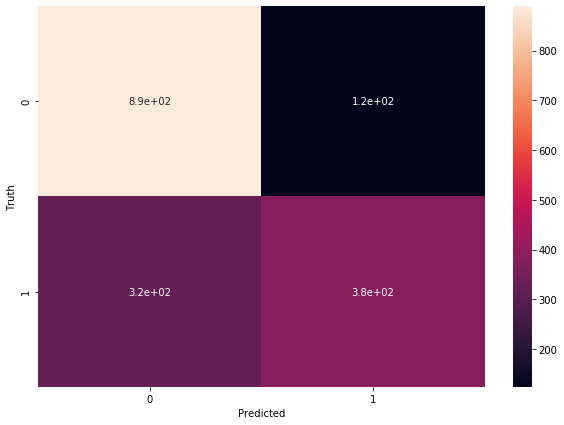

In [32]:
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
# INITIALIZE RANDOM FOREST CLASSIFIER BY TAKING no:of trees as 100 , max_depth as 3,criterion as 'gini' and random_state as 1 
# FIT RANDOM FOREST ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Random Forest
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'gini',max_depth = 3,random_state = 1 )
rfc.fit(X_train,y_train)
y_pre = np.square(rfc.predict(X_test))
con = confusion_matrix(y_test,y_pre)
TP_RFC = con[1][1]
TN_RFC = con[0][0]
FP_RFC = con[0][1]
FN_RFC = con[1][0]

print("TPR, Senstivity: ",(TP_RFC/(TP_RFC+FN_RFC)))
print("FPR: ",(FP_RFC/(TN_RFC+FP_RFC)))
print("Specivity: ", (TN_RFC/(TN_RFC+FP_RFC)))
print("Accuracy: ",((TP_RFC+TN_RFC)/(TP_RFC+TN_RFC+FP_RFC+FN_RFC)))
# END CODE

TPR, Senstivity:  0.5638297872340425
FPR:  0.11934156378600823
Specivity:  0.8806584362139918
Accuracy:  0.7424593967517401


In [34]:
# For training data RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'gini',max_depth = 3,random_state = 1 )
rfc.fit(X_train,y_train)
y_pre = np.square(rfc.predict(X_train))
con = confusion_matrix(y_train,y_pre)
TP_RFC = con[1][1]
TN_RFC = con[0][0]
FP_RFC = con[0][1]
FN_RFC = con[1][0]

print("TPR, Senstivity: ",(TP_RFC/(TP_RFC+FN_RFC)))
print("FPR: ",(FP_RFC/(TN_RFC+FP_RFC)))
print("Specivity: ", (TN_RFC/(TN_RFC+FP_RFC)))
print("Accuracy: ",((TP_RFC+TN_RFC)/(TP_RFC+TN_RFC+FP_RFC+FN_RFC)))

TPR, Senstivity:  0.5444287729196051
FPR:  0.12043435340572557
Specivity:  0.8795656465942744
Accuracy:  0.7415795586527294


In [35]:
con = confusion_matrix(y_train,y_pre)
con

array([[891, 122],
       [323, 386]], dtype=int64)

Text(69.0, 0.5, 'Truth')

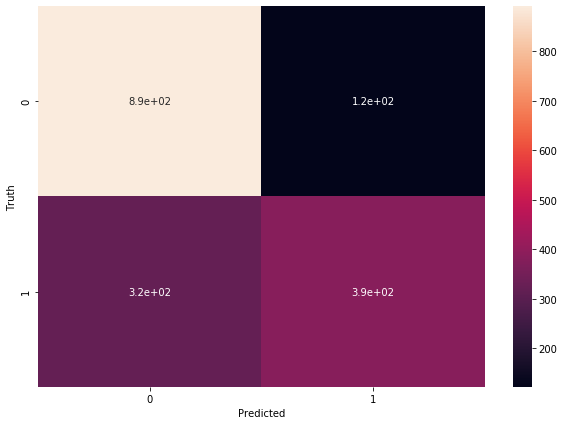

In [36]:
plt.figure(figsize = (10,7))
sn.heatmap(con, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')